In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import os
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
train_size = 100000
test_size = 40000
validation_size = 10000
columns = 2351

#path = "../Desktop/ember"
path = "./data"

x_train = np.memmap(path+"/X_train.dat", dtype=np.float32, mode="r", shape=(train_size, 2351))
y_train = np.memmap(path+"/y_train.dat", dtype=np.float32, mode="r", shape=train_size)

x_validation = x_train[70000:90000]
y_validation = y_train[70000:90000]

x_train = x_train[:40000]
y_train = y_train[:40000]


x_test = np.memmap(path+"/X_test.dat", dtype=np.float32, mode="r", shape=(test_size, 2351))
y_test = np.memmap(path+"/y_test.dat", dtype=np.float32, mode="r", shape=test_size)

In [3]:
len(x_train), len(y_train), len(x_validation), len(y_validation)

(40000, 40000, 20000, 20000)

In [4]:
max_features_num = ["auto", 0.2, "log2", "sqrt"] 
scores = []

for num in max_features_num:
    m = RandomForestClassifier(n_jobs=-1, n_estimators=40, max_features=num)
    m.fit(x_train, y_train)
    scores.append(m.score(x_validation, y_validation))

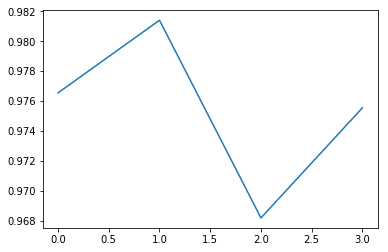

In [5]:
plt.plot(scores)

In [6]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=10, max_features="sqrt")
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 9.02 s, sys: 20.1 ms, total: 9.04 s
Wall time: 2.76 s


0.97005

In [7]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=10, max_features="auto")
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 9.61 s, sys: 16.5 ms, total: 9.63 s
Wall time: 3.25 s


0.9719

In [8]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=10, max_features=0.2)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 2min 11s, sys: 164 ms, total: 2min 11s
Wall time: 41.7 s


0.97685

In [9]:
estimators = [10, 20, 40, 80, 100, 200, 1000]

scores = []

for num in estimators:
    m = RandomForestClassifier(n_jobs=-1, n_estimators=num, max_features="sqrt")
    %time m.fit(x_train, y_train)
    scores.append(m.score(x_validation, y_validation))

CPU times: user 9.23 s, sys: 12 µs, total: 9.23 s
Wall time: 3.04 s
CPU times: user 18.3 s, sys: 23.5 ms, total: 18.3 s
Wall time: 5.35 s
CPU times: user 37.2 s, sys: 70.2 ms, total: 37.3 s
Wall time: 11 s
CPU times: user 1min 16s, sys: 676 ms, total: 1min 17s
Wall time: 22.1 s
CPU times: user 1min 34s, sys: 216 ms, total: 1min 34s
Wall time: 26.3 s
CPU times: user 3min 11s, sys: 228 ms, total: 3min 12s
Wall time: 51.9 s
CPU times: user 15min 42s, sys: 1.53 s, total: 15min 43s
Wall time: 4min 16s


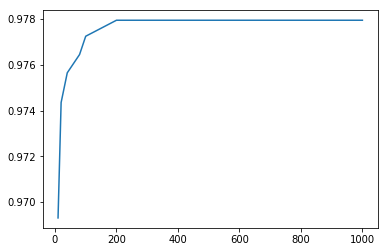

In [12]:
plt.plot(estimators, scores)

In [13]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features="sqrt")
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 2min 58s, sys: 172 ms, total: 2min 59s
Wall time: 46.3 s


0.97785

In [14]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=500, max_features="sqrt")
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 7min 28s, sys: 228 ms, total: 7min 28s
Wall time: 1min 55s


0.9779

In [15]:
leaves = [1, 2, 3, 5, 10, 25, 50]

scores = []

for leaf in leaves:
    m = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features="sqrt", min_samples_leaf=leaf)
    %time m.fit(x_train, y_train)
    scores.append(m.score(x_validation, y_validation))

CPU times: user 3min, sys: 176 ms, total: 3min
Wall time: 47.5 s
CPU times: user 2min 48s, sys: 63.8 ms, total: 2min 48s
Wall time: 43.2 s
CPU times: user 2min 41s, sys: 36.1 ms, total: 2min 41s
Wall time: 41.5 s
CPU times: user 2min 29s, sys: 68.1 ms, total: 2min 29s
Wall time: 38.7 s
CPU times: user 2min 17s, sys: 40.1 ms, total: 2min 17s
Wall time: 35.2 s
CPU times: user 1min 58s, sys: 28.1 ms, total: 1min 58s
Wall time: 30.2 s
CPU times: user 1min 48s, sys: 199 ms, total: 1min 48s
Wall time: 29.1 s


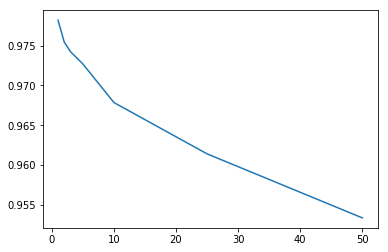

In [16]:
plt.plot(leaves, scores)

In [17]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features="sqrt", min_samples_leaf=1)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 3min 17s, sys: 565 ms, total: 3min 18s
Wall time: 1min 1s


0.97765

In [18]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=10)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 9.83 s, sys: 39.4 ms, total: 9.87 s
Wall time: 3.86 s


0.9689

In [19]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=100)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 1min 39s, sys: 175 ms, total: 1min 39s
Wall time: 29.4 s


0.9776

In [20]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=200)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 3min 20s, sys: 531 ms, total: 3min 20s
Wall time: 1min


0.9776

In [21]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features=0.2, min_samples_leaf=1)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 41min 51s, sys: 3.43 s, total: 41min 55s
Wall time: 11min 17s


0.9826

In [35]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features=0.2, min_samples_leaf=10)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 27min 46s, sys: 87 ms, total: 27min 46s
Wall time: 7min 1s


0.97575

In [36]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=1000, max_features="sqrt", min_samples_leaf=10)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 11min 19s, sys: 94 ms, total: 11min 19s
Wall time: 2min 51s


0.9685

In [37]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features="sqrt", min_samples_leaf=10)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 2min 15s, sys: 20.4 ms, total: 2min 15s
Wall time: 34.7 s


0.9684

In [38]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=500, max_features=0.2, min_samples_leaf=1)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 1h 41min 14s, sys: 1.53 s, total: 1h 41min 16s
Wall time: 25min 55s


0.9825

In [39]:
m

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
m.score(x_validation, y_validation)

0.9825

In [41]:
m.score(x_test, y_test)

0.971075

In [42]:
accuracy_score(m.predict(x_validation), y_validation)

0.9825

In [43]:
r2_score(m.predict(x_validation), y_validation)

0.929337877088012